In [1]:
from urllib.request import urlopen, Request

In [2]:

req = Request("https://beemovie.fandom.com/wiki/Bee_Movie/Transcript") 


In [3]:
response = urlopen(req)


In [4]:
html = response.read()


In [5]:
response.close()

In [6]:
from bs4 import BeautifulSoup

In [7]:
soup = BeautifulSoup(html, "html.parser")

In [8]:
# print(soup.prettify())

In [9]:
contents =[]
for td in soup.find_all('td'):
    for b in soup.find_all('b'):
        b.decompose()
    contents.append(td)
# contents
        

In [10]:
text = BeautifulSoup(str(contents), "lxml").text
#text


In [11]:
import nltk
import string

In [12]:
from nltk.tokenize import sent_tokenize

In [13]:
sentences = sent_tokenize(str(text))

In [14]:
# sentences

In [15]:
noPunct = str(sentences).translate(str.maketrans('','',string.punctuation))

In [16]:
from nltk.tokenize import word_tokenize

In [17]:
words = word_tokenize(str(noPunct))

In [18]:
#words

In [19]:
from nltk.corpus import stopwords

In [20]:
stops = stopwords.words('english')

In [21]:
wordList = []
for w in words:
    w = w.lower()
    if w not in stops and w != 'n':
       wordList.append(w)

In [22]:
#wordList

In [23]:
wordSet = set(wordList)

In [24]:
wordFreqDict = {}
for word in wordSet:
    wordFreqDict[word]= wordList.count(word)
#wordFreqDict

In [25]:
sortedFreq = sorted(wordFreqDict.items(), key = lambda kv:kv[1], reverse = True)
#sortedFreq

In [26]:
sortedFreqDict = dict(sortedFreq)
#sortedFreqDict

In [27]:
from wordcloud import WordCloud

In [28]:
S = ' '.join(wordList)

In [29]:
wordcloud = WordCloud().generate(S)

In [30]:
import matplotlib.pyplot as plot

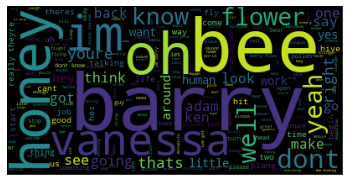

In [31]:
plot.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=False, labelbottom=False)
plot.imshow(wordcloud)